# CHAPTER 1 - Introduction

**Name**    : Aulia Putri Nugrahani

**Batch**   : HCK - 029

## I. Background

Workplace burnout is a psychological syndrome caused by prolonged, unmanaged stress. It is marked by emotional exhaustion, detachment, and reduced professional performance. While not classified as a medical condition, the [World Health Organization (WHO)](http://who.int/standards/classifications/frequently-asked-questions/burn-out-an-occupational-phenomenon) recognizes burnout as an occupational phenomenon in the ICD-11.

Burnout affects more than individual health, it has serious organizational consequences. It increases the risk of depression, anxiety, absenteeism, disengagement, and turnover. A [2023 Gallup](https://www.gallup.com/workplace/288539/employee-burnout-biggest-myth.aspx) report found that 76% of employees experience burnout at least occasionally, with 21% reporting they feel burned out “very often or always.”

For companies, this translates to significant losses including reduced productivity, higher healthcare costs, and expensive employee replacement. Burnout also damages morale, team dynamics, and long-term performance. Despite this, many organizations still lack systems to detect and address mental health risks early, missing critical opportunities for prevention and support. Early detection is essential—not only to protect employee well-being, but also to enable timely interventions that prevent deeper organizational impact.

Research published in the [American Journal of Preventive Medicine](https://www.ajpmonline.org/article/S0749-3797(25)00023-6/abstract) shows just how costly burnout can be. Over the course of a year, employee disengagement, overextension, and burnout cost employers an average of $3,999 per nonmanagerial hourly employee, $4,257 per nonmanagerial salaried employee, $10,824 per manager, and $20,683 per executive. For an average U.S. company with 1,000 employees, this adds up to $5.04 million in losses annually, along with a significant reduction in overall employee quality of life. These numbers highlight the urgent need for early detection and prevention strategies in the workplace.


## 2. Project Objective

This project aims to develop a machine learning system designed to support mental health monitoring in the workplace. The system has three main goals:

1. Predict an individual's risk of experiencing burnout, based on features related to:

    * Psychological well-being

    * Workplace environment and workload

    * Work-life balance and lifestyle habits

2. Provide personalized recommendations based on the prediction outcome:
    * **For individuals at risk**: The system will recommend seeking immediate professional support, such as therapy with a licensed psychologist or counselor. In addition, it will offer helpful resources and articles on how to manage work-related stress and maintain mental well-being.

    * **For individuals not at risk**: The system will provide preventive educational materials, including information on early warning signs of burnout, stress-reduction strategies, and optional access to professional support.
    
This system is designed to help companies proactively monitor and support employee well-being, while promoting a culture of mental health awareness and early intervention in the workplace.

Source:
1. http://who.int/standards/classifications/frequently-asked-questions/burn-out-an-occupational-phenomenon
2. https://www.gallup.com/workplace/288539/employee-burnout-biggest-myth.aspx
3. https://www.ajpmonline.org/article/S0749-3797(25)00023-6/abstract

# CHAPTER 2  - Import Libraries

In [183]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk eksplorasi data dan statistik
from scipy.stats import kendalltau

# Library untuk preprocessing dan feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import PCA

# untuk feature engineering
from scipy.stats import kendalltau, chi2_contingency
from sklearn.model_selection import train_test_split

#pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import GradientBoostingClassifier

# Model Definition
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model eval
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, roc_auc_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#Hyperparameter
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# Library untuk penyimpanan model
import pickle
import json

# CHAPTER 3 - Data Loading

In [303]:
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [304]:
# Checking the top 10 data
df.head(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


In [186]:
# Check the last 10 data
df.tail(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4990,EMP4991,58,Prefer not to say,Project Manager,Consulting,10,Onsite,45,10,1,High,NaN,Yes,Increase,5,Unsatisfied,3,NaN,Poor,Africa
4991,EMP4992,60,Female,Data Scientist,IT,9,Hybrid,57,4,2,Low,Burnout,Yes,Increase,4,Satisfied,5,Weekly,Average,Oceania
4992,EMP4993,55,Prefer not to say,Project Manager,Consulting,21,Hybrid,45,7,2,High,Anxiety,No,No Change,2,Satisfied,3,Daily,Poor,Africa
4993,EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,5,Medium,NaN,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


In [187]:
df.shape

(5000, 20)

# CHAPTER 4 - Exploratory Data Analysis (EDA)

## 4.1.Burnout Risk Indicator

To better understand the drivers of workplace mental health risks, we identified four key risk factors based on the WHO's ICD-11 classification of burnout. Burnout is defined as a syndrome resulting from chronic workplace stress that has not been successfully managed. It is characterized by exhaustion, mental detachment from work, and reduced professional efficacy.

In our analysis, individuals are considered at risk if they meet any of the following conditions:

1. High Stress: Stress_Level == 'High'

2. Poor Sleep Quality: Sleep_Quality == 'Poor'

3. Overtime Work: Hours_Worked_Per_Week > 55

4. Productivity Decline: Productivity_Change == 'Decrease'

These indicators help identify employees who may be experiencing early signs of burnout in a workplace setting.

In [188]:
df1 = df.copy()

In [189]:
df1['Risk_Score'] = (
    (df1['Stress_Level'] == 'High').astype(int) +
    (df1['Sleep_Quality'] == 'Poor').astype(int) +
    (df1['Hours_Worked_Per_Week'] > 50).astype(int) +
    (df1['Productivity_Change'] == 'Decrease').astype(int)
)

# Optional: flag at-risk employees (e.g., 2 or more risk factors)
df1['At_Risk'] = df1['Risk_Score'] >= 2

## 4.2.Distribution of Each Factors

### 4.2.1. Distribution of Working Hours

/var/folders/93/_gvq69w56z34l9ch__8zjgs80000gn/T/ipykernel_26116/585677909.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hours_count.index, y=hours_count.values, palette='pastel')


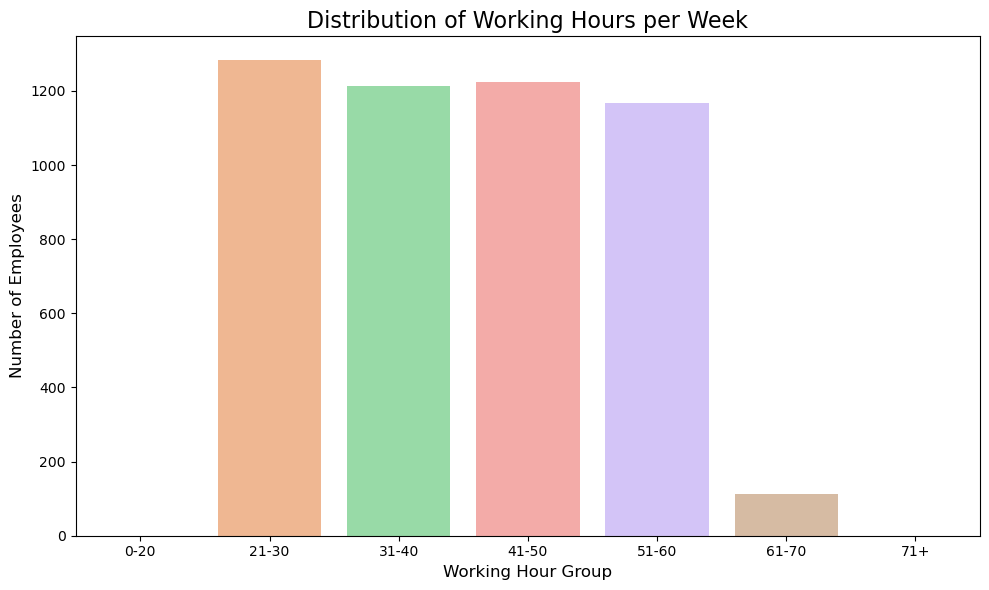

In [190]:
# Distribution of Working Hours

# Create hour bins
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
df1['Working_Hours_Group'] = pd.cut(df1['Hours_Worked_Per_Week'], bins=bins, labels=labels, right=False)

# Count each group
hours_count = df1['Working_Hours_Group'].value_counts().sort_index()

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=hours_count.index, y=hours_count.values, palette='pastel')

# Labels and title
plt.title('Distribution of Working Hours per Week', fontsize=16)
plt.xlabel('Working Hour Group', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


The chart illustrates the distribution of employees based on their weekly working hours. Most employees fall within the 21–50 hour range, with the highest concentration in the 21–30 hour group, followed closely by the 31–40 and 41–50 hour groups. A significant number also work 51–60 hours per week—surpassing the standard 40-hour workweek and nearing the 55-hour threshold identified by the World Health Organization as a health risk. Very few employees work more than 60 hours, and none are recorded below 20 hours, suggesting that the majority are full-time workers, with a portion potentially at higher risk of burnout due to extended working hours.

### 4.2.2. Distribution of Stress Level

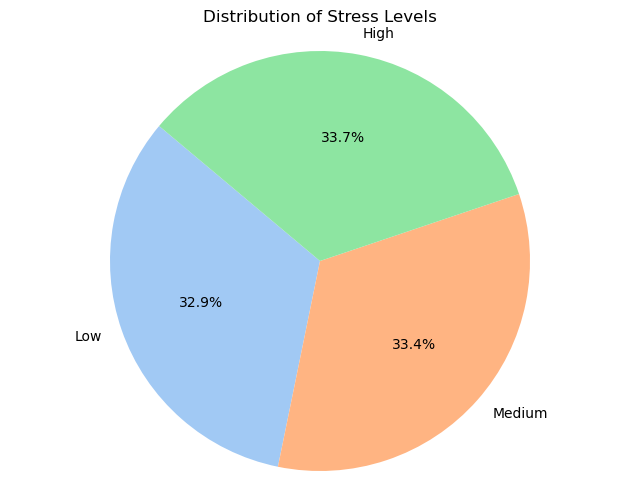

In [191]:
# Distribution of Stress Level 
stress_counts = df1['Stress_Level'].value_counts().reindex(['Low', 'Medium', 'High'])

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    stress_counts,
    labels=stress_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=140
)
plt.title('Distribution of Stress Levels')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


The pie chart shows an even distribution of stress levels among employees, with 32.9% reporting low stress, 33.4% medium stress, and 33.7% high stress. This indicates that stress is experienced across the board, with a slightly higher proportion facing high stress—highlighting the importance of monitoring and addressing stress as a potential contributor to burnout.


### 4.2.3. Distribution of Sleep Quality

/var/folders/93/_gvq69w56z34l9ch__8zjgs80000gn/T/ipykernel_26116/4216444848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sleep_Quality', data=df1, order=['Poor', 'Average', 'Good'], palette='pastel')


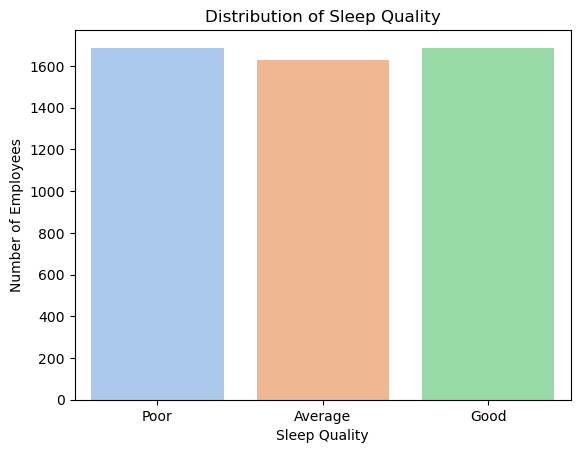

In [192]:
# Distribution of Sleep Quality
sns.countplot(x='Sleep_Quality', data=df1, order=['Poor', 'Average', 'Good'], palette='pastel')
plt.title('Distribution of Sleep Quality')
plt.ylabel('Number of Employees')
plt.xlabel('Sleep Quality')
plt.show()

The bar chart shows the distribution of employees based on their reported **sleep quality**, categorized into *Poor*, *Average*, and *Good*. The counts across the three categories are relatively balanced, with each group having around 1,650 employees. This indicates a fairly even spread, but notably, a significant number of individuals report **poor sleep quality**, which is concerning given its strong association with burnout risk. The presence of poor sleep across a large portion of the workforce highlights the need for interventions promoting better sleep hygiene and recovery.


### 4.2.4. Distribution of Productivity Change

/var/folders/93/_gvq69w56z34l9ch__8zjgs80000gn/T/ipykernel_26116/1073671741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Productivity_Change', data=df1, palette='coolwarm')


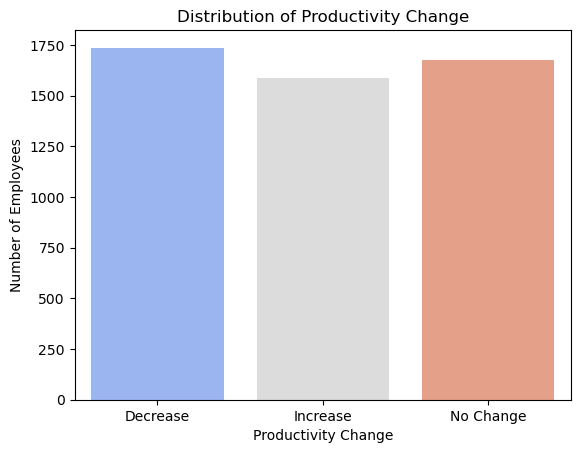

In [193]:
# Distribution of Productivity Change
sns.countplot(x='Productivity_Change', data=df1, palette='coolwarm')
plt.title('Distribution of Productivity Change')
plt.xlabel('Productivity Change')
plt.ylabel('Number of Employees')
plt.show()

The bar chart illustrates the distribution of **productivity changes** among employees, categorized into *Decrease*, *Increase*, and *No Change*. The largest group reported a **decrease in productivity**, followed by those with **no change**, and then those who experienced an **increase**. This pattern suggests that a notable portion of employees may be experiencing burnout symptoms such as reduced focus, motivation, or energy, which are known to negatively impact productivity. The relatively high count in the *Decrease* group highlights the importance of monitoring performance trends as potential early indicators of burnout risk.


Overall:

The analysis reveals several warning signs of burnout risk among employees. While most work between 21–50 hours per week, a significant portion exceeds 51 hours—approaching the WHO’s risk threshold. Stress levels are evenly spread, with a slightly higher percentage in the high-stress group, emphasizing the need for stress management. Sleep quality is also evenly distributed, but the high number reporting poor sleep is concerning due to its link to burnout. Lastly, decreased productivity is the most common trend, signaling potential burnout symptoms. These findings highlight the need for targeted interventions to improve well-being and prevent burnout.

## 4.3. Analysis

### 4.3.1. Proportion of At-Risk Employees

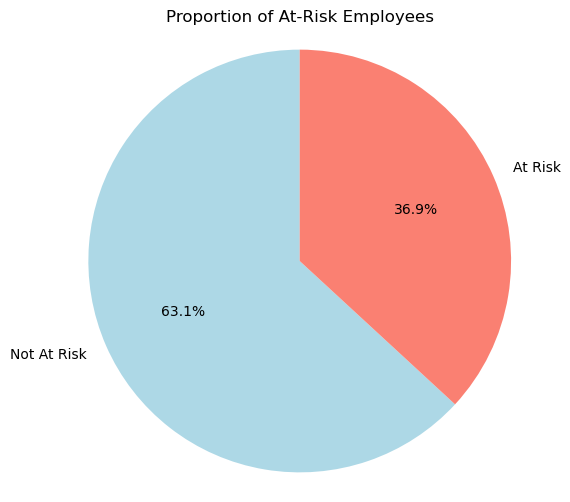

In [306]:
# Count values
risk_counts = df1['At_Risk'].value_counts().sort_index()
labels = ['Not At Risk', 'At Risk']
colors = ['lightblue', 'salmon']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(risk_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of At-Risk Employees')
plt.axis('equal')  
plt.show()

The pie chart shows that **36.9%** of employees are identified as **at risk of burnout**, while **63.1%** are **not at risk**. This means more than a third of the workforce may be experiencing conditions that contribute to burnout, emphasizing the need for timely support and preventive measures within the organization.


### 4.3.2. Oveworked Job Role

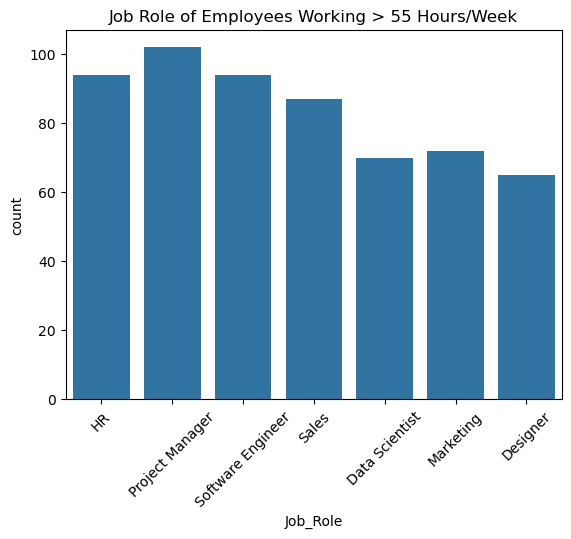

In [309]:
# Distribution of Working Hours
overworkers = df1[df1['Hours_Worked_Per_Week'] > 55]

# Count by Job Role
sns.countplot(x='Job_Role', data=overworkers)
plt.title('Job Role of Employees Working > 55 Hours/Week')
plt.xticks(rotation=45)
plt.show()


This bar chart shows the distribution of employees who are **overworked** (i.e., working more than 55 hours per week) across different job roles. The role with the **highest number of overworked employees** is **Project Manager**, followed closely by **Software Engineer** and **HR**. In contrast, roles such as **Data Scientist**, **Marketing**, and **Designer** have comparatively fewer overworked individuals. This suggests that **project-driven and coordination-intensive roles** tend to experience heavier workloads, indicating a greater need for workload monitoring and burnout prevention strategies in these job categories.

### 4.3.3. Job Role With The Highest Stress

/var/folders/93/_gvq69w56z34l9ch__8zjgs80000gn/T/ipykernel_26116/3751453305.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


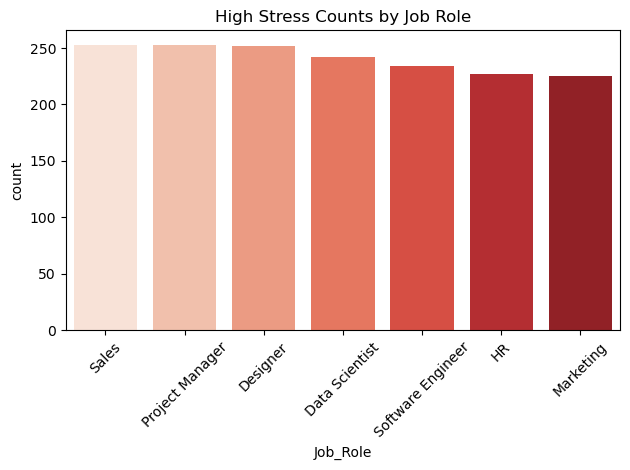

In [196]:
# Filter data for employees with high stress levels
high_stress = df1[df1['Stress_Level'] == 'High']

# Now plot
sns.countplot(
    x='Job_Role',
    data=high_stress,
    order=high_stress['Job_Role'].value_counts().index,
    palette='Reds'
)
plt.title('High Stress Counts by Job Role')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart displays the number of employees reporting high stress levels across different job roles. The top three roles with the highest counts of high stress are Sales, Project Manager, and Designer. While the differences are relatively small, roles like Software Engineer, HR, and Marketing report slightly fewer high-stress cases. This suggests that while stress is common across all roles, client-facing or deadline-driven roles such as Sales and Project Management may carry slightly higher stress burdens, indicating areas where targeted stress management initiatives could be prioritized.

### 4.2.4. Stress Level of Overworked Employee

/var/folders/93/_gvq69w56z34l9ch__8zjgs80000gn/T/ipykernel_26116/2216786541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stress_Level', data=overworkers, order=['Low', 'Medium', 'High'], palette='Reds')


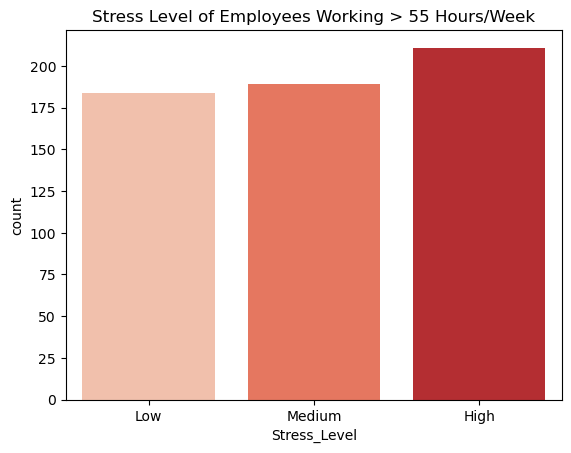

In [310]:
# Stress Level of Overworked Employee
sns.countplot(x='Stress_Level', data=overworkers, order=['Low', 'Medium', 'High'], palette='Reds')
plt.title('Stress Level of Employees Working > 55 Hours/Week')
plt.show()


The bar chart shows the **stress levels of employees working more than 55 hours per week**. Among this group, the largest number report **high stress**, followed by medium and low stress. This pattern suggests a **clear association between long working hours and increased stress levels**, supporting existing research that extended workweeks contribute to higher burnout risk. It emphasizes the importance of monitoring work hour policies and providing support for employees regularly exceeding healthy workload limits.


Overall:


The analysis highlights a significant concern around employee well-being, with over one-third (36.9%) of employees identified as at risk of burnout. This risk is notably higher among those working more than 55 hours per week, where a majority report high stress levels. Specific roles such as Project Managers, Software Engineers, HR personnel, and Sales staff appear to be particularly vulnerable. Either due to heavy workloads, high coordination demands, or client-facing pressures.

These patterns suggest a strong link between long working hours, job role demands, and burnout risk, reinforcing findings from established research. The insight is clear: burnout is not evenly distributed—it disproportionately affects roles with greater workload intensity and time pressure.


# CHAPTER 5 - Feature Engineering

In [ ]:
# Dataframe
df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [ ]:
# Dividing the columns to Numerical and Categorical
num_cols = [
    'Years_of_Experience',
    'Hours_Worked_Per_Week',
    'Number_of_Virtual_Meetings',
    'Work_Life_Balance_Rating',
    'Social_Isolation_Rating',
    'Company_Support_for_Remote_Work'
]
cat_cols = [
    'Job_Role',
    'Industry',
    'Work_Location',
    'Access_to_Mental_Health_Resources',
    'Productivity_Change',
    'Satisfaction_with_Remote_Work',
    'Physical_Activity',
    'Sleep_Quality'
]


## 5.1. Handling Cardinality

In [ ]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Job_Role,7,"[HR, Data Scientist, Software Engineer, Sales, Marketing, Designer, Project Manager]"
1,Industry,7,"[Healthcare, IT, Education, Finance, Consulting, Manufacturing, Retail]"
2,Work_Location,3,"[Hybrid, Remote, Onsite]"
3,Access_to_Mental_Health_Resources,2,"[No, Yes]"
4,Productivity_Change,3,"[Decrease, Increase, No Change]"
5,Satisfaction_with_Remote_Work,3,"[Unsatisfied, Satisfied, Neutral]"
6,Physical_Activity,2,"[Weekly, nan, Daily]"
7,Sleep_Quality,3,"[Good, Poor, Average]"


The categorical features in the dataset have low to moderate cardinality. Most columns, such as Gender, Work_Location, and Access_to_Mental_Health_Resources, have only 2 to 4 unique values. Even features with more categories, like Job_Role and Industry, are limited to around 7 unique values. This indicates that the dataset does not suffer from high-cardinality issues

## 5.2. Handling Missing Values

In [ ]:
df.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [ ]:
# Fill nulls with 'No Condition'
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna('No Condition')

In [ ]:
df['Physical_Activity'] = df['Physical_Activity'].fillna('None')

To handle missing values in the dataset, we filled the Mental_Health_Condition column with 'No Condition'. This choice was made because if no mental health condition was reported, it's reasonable to assume that the individual did not experience or disclose any such issue. Using 'No Condition' helps keep the data consistent and avoids confusion, rather than leaving it blank or ambiguous.

Similarly, for the Physical_Activity column, missing values were replaced with 'None'. This assumes that if no physical activity was recorded, the individual likely does not engage in regular exercise. By doing this, we preserve the full dataset without dropping any rows, while still giving clear meaning to the missing entries. It also helps simplify analysis, especially when grouping or comparing categories.

In [ ]:
# Checking if there is still any missing values 
df.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

## 5.3. Creating New Column for Target

This step involves creating a new column to serve as the target variable for predicting burnout risk. The column is based on key indicators such as high stress, poor sleep quality, long working hours, and decreased productivity. Individuals meeting two or more of these conditions are flagged as at risk. This binary target helps simplify the classification process by clearly distinguishing between those who are at risk of burnout and those who are not.


Factors Used to Identify Burnout Risk:

1. **Stress Levels**

Burnout is closely linked to prolonged and unmanaged work-related stress. Individuals experiencing high levels of stress are more likely to exhibit symptoms of burnout. Therefore, stress level is a critical indicator—those categorized with high stress are considered at greater risk.

2. **Sleep Quality**

According to the study "Sleep Quality and Burnout: A Singapore Study", poor sleep quality is linearly and progressively associated with burnout. Individuals with poor sleep are more vulnerable to emotional exhaustion and reduced cognitive performance. As such, sleep quality serves as an important predictor in identifying individuals at risk.

3. **Working Hours**

Standard full-time work is typically around 40 hours per week. Research by the World Health Organization (WHO) and International Labour Organization (ILO) found that working more than 55 hours per week significantly increases the risk of serious health issues—such as a 17% higher risk of heart attack and a 35% higher risk of stroke. Given these findings, the 55-hour threshold is used as a benchmark for identifying excessive workloads that may contribute to burnout.

4. **Productivity Change**

Burnout often results in noticeable declines in work performance. Tasks that were once manageable may become overwhelming, leading to missed deadlines, increased errors, and reduced overall output. It can also impair cognitive functioning, such as memory, concentration, and decision-making. Changes in productivity are not only personal indicators of burnout but can also affect team dynamics and organizational effectiveness. Therefore, shifts in productivity are used as a signal of potential burnout risk.

Source: 
- https://pubmed.ncbi.nlm.nih.gov/36706670/
- https://www.linkedin.com/pulse/impact-burnout-employee-productivity-call-action-modern-workplaces-5hyfc/
- https://www.ualberta.ca/en/folio/2024/01/seven-things-you-should-know-about-job-burnout.html#:~:text=He%20cites%20research%20conducted%20by,of%20harmful%20effects%20on%20health.

In [232]:
# Create individual risk factor flags
df['risk_stress'] = df['Stress_Level'] == 'High'
df['risk_sleep'] = df['Sleep_Quality'] == 'Poor'
df['risk_overtime'] = df['Hours_Worked_Per_Week'] > 55
df['risk_productivity'] = df['Productivity_Change'] == 'Decrease'


In [234]:
# Combine into burnout risk score
df['risk_score'] = (
    df['risk_stress'].astype(int) +
    df['risk_sleep'].astype(int) +
    df['risk_overtime'].astype(int) + 
    df['risk_productivity'].astype(int) 
)


In [235]:
# Final label: 1 if 2 or more burnout risk conditions are met
df['Burnout_Risk'] = (df['risk_score'] >= 2).astype(int)


In [236]:
# Dropping columns
df.drop(['Region', 'Mental_Health_Condition'], axis=1, inplace=True)


We dropped the 'Region' and 'Mental_Health_Condition' columns from the dataset for the following reasons:

* Region: Since the goal of this is to predict burnout risk at the company level, regional information is not relevant for this context. Including it would not provide meaningful insight for internal organizational analysis or decision-making.

* Mental_Health_Condition: This column contains explicit labels such as burnout, which directly overlaps with our target variable (Mental_Health_Risk). Including it would lead to data leakage, allowing the model to "cheat" by learning from a feature that already encodes the outcome we’re trying to predict. To ensure valid and generalizable results, we exclude it from the feature set.

In [237]:
# Count of each class (0 = No Burnout Risk, 1 = At Risk)
burnout_counts = df['Burnout_Risk'].value_counts()
print(burnout_counts)


Burnout_Risk
0    3389
1    1611
Name: count, dtype: int64


This shows that 3,389 individuals are not at risk of burnout (0), while 1,611 individuals are at risk (1). The distribution is imbalanced, with the "No Burnout Risk" class being more than twice the size of the "At Risk" class.

This class imbalance is an important consideration when building predictive models. Without addressing it, the model may become biased toward predicting the majority class (no risk), leading to poor performance in identifying at-risk individuals. To handle this, I plan to apply class balancing techniques (e.g., SMOTENC) and use evaluation metrics like F1-score that are more appropriate for imbalanced datasets.

## Splitting X (Features) and Y (Target)

To prepare the data for modeling, we first separate the features and the target variable:

In [238]:
X = df.drop('Burnout_Risk', axis=1)
y = df['Burnout_Risk']


* X contains all the predictor variables that will be used by the model to learn patterns.

* y contains the Burnout_Risk column, which is the target we aim to predict — where 1 indicates an employee is at risk of burnout, and 0 indicates they are not at risk.

## Checking Outlier

In [239]:
listItem = []

for col in num_cols:
    skew_val = round(df[col].skew(), 1)
    
    if -0.5 <= skew_val <= 0.5:
        distribution = 'normal'
    else:
        distribution = 'skewed'
    
    listItem.append([col, skew_val, distribution])


skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data=listItem)
skewness

,nama kolom,nilai skewness,distribution
0,Years_of_Experience,0.0,normal
1,Hours_Worked_Per_Week,0.0,normal
2,Number_of_Virtual_Meetings,-0.0,normal
3,Work_Life_Balance_Rating,0.0,normal
4,Social_Isolation_Rating,0.0,normal


These results indicate that all listed features: Years of Experience, Number of Virtual Meetings, Social Isolation Rating, and Work-Life Balance Rating—have skewness values very close to zero. This suggests that their data distributions are approximately normal, meaning they are symmetrically distributed around the mean. Such distributions are generally desirable in statistical modeling and machine learning, as many algorithms (especially linear models) perform better when the input features are normally distributed. 

## Feature Selection

In [240]:
p_values = []
interpretasi = []
cols = []
for col in num_cols:
    corr_coef, p_value = kendalltau(X[col], y)

    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretasi.append('ada korelasi')
    else:
        interpretasi.append('ga ada korelasi')

# Create result DataFrame
kendall_result = pd.DataFrame({
    'nama kolom': cols,
    'p-value': p_values,
    'hasil': interpretasi
})

kendall_result

,nama kolom,p-value,hasil
0,Years_of_Experience,7.150616e-01,ga ada korelasi
1,Hours_Worked_Per_Week,8.430420e-37,ada korelasi
2,Number_of_Virtual_Meetings,7.695569e-01,ga ada korelasi
3,Work_Life_Balance_Rating,8.131635e-02,ga ada korelasi
4,Social_Isolation_Rating,2.664447e-02,ada korelasi


In [241]:
p_values = []
interpretasi = []
cols = []

# Loop over categorical columns
for col in cat_cols:
    # Create contingency table
    contingency_table = pd.crosstab(X[col], y)
    
    # Perform Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    p_values.append(p_value)
    cols.append(col)
    
    if p_value < 0.05:
        interpretasi.append('ada asosiasi')
    else:
        interpretasi.append('tidak ada asosiasi')

# Create result DataFrame
hasil_chi2 = pd.DataFrame({
    'nama kolom': cols,
    'p-value': p_values,
    'hasil': interpretasi
})

hasil_chi2

,nama kolom,p-value,hasil
0,Job_Role,5.602735e-01,tidak ada asosiasi
1,Industry,7.459993e-01,tidak ada asosiasi
2,Work_Location,7.699204e-01,tidak ada asosiasi
3,Access_to_Mental_Health_Resources,1.799968e-02,ada asosiasi
4,Physical_Activity,6.508510e-02,tidak ada asosiasi
5,Company_Support_for_Remote_Work,6.207213e-02,tidak ada asosiasi
6,Sleep_Quality,4.873696e-257,ada asosiasi
7,Productivity_Change,6.389314e-216,ada asosiasi
8,Stress_Level,1.857839e-219,ada asosiasi



The features selected for this study are grounded in organizational psychology research on burnout, drawing from the NSW Public Service Commission’s *Burnout Organisational Risk Factors Guide* and the American Psychological Association’s workplace burnout insights. Research consistently identifies key contributors to burnout, including excessive workload, inadequate support, poor work-life balance, social isolation, and unclear job roles.

Based on these risk domains, we selected the following 10 features: 'Job_Role', 'Industry', 'Years_of_Experience', 'Work_Location', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Access_to_Mental_Health_Resources', 'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work', and 'Physical_Activity'. These features capture relevant organizational and individual factors commonly associated with burnout while excluding variables already transformed into binary risk indicators.

To avoid data leakage, we excluded features that were directly used in labeling the target variable (Mental_Health_Risk).


In [299]:
selected_features = [
    'Job_Role',                           
    'Industry',                           
    'Years_of_Experience',                
    'Work_Location',                      
    'Hours_Worked_Per_Week',             
    'Number_of_Virtual_Meetings',         
    'Work_Life_Balance_Rating',           
    'Access_to_Mental_Health_Resources', 
    'Physical_Activity',                 
    'Social_Isolation_Rating',            
    'Company_Support_for_Remote_Work',    
    'Sleep_Quality',                      
    'Productivity_Change',               
    'Stress_Level'                        
]



## Splitting Train Set and Test Set

In [300]:
X = df[selected_features]
y = df['Burnout_Risk']


In [301]:
X.columns

Index(['Job_Role', 'Industry', 'Years_of_Experience', 'Work_Location',
       'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Work_Life_Balance_Rating', 'Access_to_Mental_Health_Resources',
       'Physical_Activity', 'Social_Isolation_Rating',
       'Company_Support_for_Remote_Work', 'Sleep_Quality',
       'Productivity_Change', 'Stress_Level'],
      dtype='object')

In [296]:
#Splitting training & testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=12,
    stratify=y
)

print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (4500, 10)
Test Size (500, 10)


## Data Balancing

In [247]:
# Check distribution of target class on our train set
print(pd.Series(y_train).value_counts())
print(pd.Series(y_train).value_counts(normalize=True))

Burnout_Risk
0    3050
1    1450
Name: count, dtype: int64
Burnout_Risk
0    0.677778
1    0.322222
Name: proportion, dtype: float64


## Pipeline

In [249]:
num_cols = [
    'Years_of_Experience',
    'Number_of_Virtual_Meetings',
    'Work_Life_Balance_Rating',
    'Social_Isolation_Rating'
]
cat_cols = [
    'Job_Role',
    'Industry',
    'Work_Location',
    'Access_to_Mental_Health_Resources',
    'Physical_Activity',
    'Company_Support_for_Remote_Work'
]


In [250]:
# Make sure to use the same feature order
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Get indices of categorical columns for SMOTENC
categorical_indices = [X_train.columns.get_loc(col) for col in cat_cols]


In [251]:
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


In [252]:
ordinal_encoder = OrdinalEncoder()
X_train[cat_nominal_cols] = ordinal_encoder.fit_transform(X_train[cat_nominal_cols])
X_test[cat_nominal_cols] = ordinal_encoder.transform(X_test[cat_nominal_cols])


In [254]:
smoteNC = SMOTENC(
    categorical_features=categorical_indices,
    random_state=42
)

# CHAPTER 6 - Model Definition

In [255]:
# buat model

Knn = KNeighborsClassifier()
Svc= SVC(probability=True, random_state=44)
Dt= DecisionTreeClassifier(random_state=44)
Rf= RandomForestClassifier(random_state=44)
Gb= GradientBoostingClassifier(random_state=44)

In [256]:
#hubungkan preproses dengan model
pipe_Knn = imbpipeline([('SMOTE',smoteNC),
                        ('fe', preprocess),
                        ('KNN', Knn)])

pipe_Svc = imbpipeline([('SMOTE',smoteNC),
                        ('fe', preprocess),
                        ('SVC', Svc)])

pipe_Dt = imbpipeline([('SMOTE',smoteNC),
                       ('fe', preprocess),
                       ('DT', Dt)])

pipe_Rf = imbpipeline([('SMOTE',smoteNC),
                       ('fe', preprocess),
                       ('RF', Rf)])

pipe_Gb = imbpipeline([('SMOTE',smoteNC),
                       ('fe', preprocess),
                       ('GB', Gb)])


In [257]:
pipe_Knn

Pipeline(steps=[('SMOTE',
                 SMOTENC(categorical_features=[0, 1, 3, 6, 7, 9],
                         random_state=42)),
                ('fe',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years_of_Experience',
                                                   'Number_of_Virtual_Meetings',
                                                   'Work_Life_Balance_Rating',
                                                   'Social_Isolation_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job_Role', 'Industry',
                                                   'Work_Location',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Physical_Activity',
                                                   'Company_Support_for_Remote_Work'])])),
                ('KNN', KNeighborsClassifier())])

In [258]:
pipe_Svc

Pipeline(steps=[('SMOTE',
                 SMOTENC(categorical_features=[0, 1, 3, 6, 7, 9],
                         random_state=42)),
                ('fe',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years_of_Experience',
                                                   'Number_of_Virtual_Meetings',
                                                   'Work_Life_Balance_Rating',
                                                   'Social_Isolation_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job_Role', 'Industry',
                                                   'Work_Location',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Physical_Activity',
                                                   'Company_Support_for_Remote_Work'])])),
                ('SVC', SVC(probability=True, random_state=44))])

In [259]:
pipe_Dt

Pipeline(steps=[('SMOTE',
                 SMOTENC(categorical_features=[0, 1, 3, 6, 7, 9],
                         random_state=42)),
                ('fe',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years_of_Experience',
                                                   'Number_of_Virtual_Meetings',
                                                   'Work_Life_Balance_Rating',
                                                   'Social_Isolation_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job_Role', 'Industry',
                                                   'Work_Location',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Physical_Activity',
                                                   'Company_Support_for_Remote_Work'])])),
                ('DT', DecisionTreeClassifier(random_state=44))])

In [260]:
pipe_Rf

Pipeline(steps=[('SMOTE',
                 SMOTENC(categorical_features=[0, 1, 3, 6, 7, 9],
                         random_state=42)),
                ('fe',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years_of_Experience',
                                                   'Number_of_Virtual_Meetings',
                                                   'Work_Life_Balance_Rating',
                                                   'Social_Isolation_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job_Role', 'Industry',
                                                   'Work_Location',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Physical_Activity',
                                                   'Company_Support_for_Remote_Work'])])),
                ('RF', RandomForestClassifier(random_state=44))])

In [261]:
pipe_Gb

Pipeline(steps=[('SMOTE',
                 SMOTENC(categorical_features=[0, 1, 3, 6, 7, 9],
                         random_state=42)),
                ('fe',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years_of_Experience',
                                                   'Number_of_Virtual_Meetings',
                                                   'Work_Life_Balance_Rating',
                                                   'Social_Isolation_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job_Role', 'Industry',
                                                   'Work_Location',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Physical_Activity',
                                                   'Company_Support_for_Remote_Work'])])),
                ('GB', GradientBoostingClassifier(random_state=44))])

# CHAPTER 7 - Model Training

In [262]:
pipe_Knn.fit(X_train,y_train)

Pipeline(steps=[('SMOTE',
                 SMOTENC(categorical_features=[0, 1, 3, 6, 7, 9],
                         random_state=42)),
                ('fe',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years_of_Experience',
                                                   'Number_of_Virtual_Meetings',
                                                   'Work_Life_Balance_Rating',
                                                   'Social_Isolation_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job_Role', 'Industry',
                                                   'Work_Location',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Physical_Activity',
                                                   'Company_Support_for_Remote_Work'])])),
                ('KNN', KNeighborsClassifier())])

In [263]:
pipe_Svc.fit(X_train,y_train)

Pipeline(steps=[('SMOTE',
                 SMOTENC(categorical_features=[0, 1, 3, 6, 7, 9],
                         random_state=42)),
                ('fe',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years_of_Experience',
                                                   'Number_of_Virtual_Meetings',
                                                   'Work_Life_Balance_Rating',
                                                   'Social_Isolation_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job_Role', 'Industry',
                                                   'Work_Location',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Physical_Activity',
                                                   'Company_Support_for_Remote_Work'])])),
                ('SVC', SVC(probability=True, random_state=44))])

In [265]:
pipe_Dt.fit(X_train,y_train)

Pipeline(steps=[('SMOTE',
                 SMOTENC(categorical_features=[0, 1, 3, 6, 7, 9],
                         random_state=42)),
                ('fe',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years_of_Experience',
                                                   'Number_of_Virtual_Meetings',
                                                   'Work_Life_Balance_Rating',
                                                   'Social_Isolation_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job_Role', 'Industry',
                                                   'Work_Location',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Physical_Activity',
                                                   'Company_Support_for_Remote_Work'])])),
                ('DT', DecisionTreeClassifier(random_state=44))])

In [266]:
pipe_Rf.fit(X_train,y_train)

Pipeline(steps=[('SMOTE',
                 SMOTENC(categorical_features=[0, 1, 3, 6, 7, 9],
                         random_state=42)),
                ('fe',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years_of_Experience',
                                                   'Number_of_Virtual_Meetings',
                                                   'Work_Life_Balance_Rating',
                                                   'Social_Isolation_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job_Role', 'Industry',
                                                   'Work_Location',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Physical_Activity',
                                                   'Company_Support_for_Remote_Work'])])),
                ('RF', RandomForestClassifier(random_state=44))])

In [267]:
pipe_Gb.fit(X_train,y_train)

Pipeline(steps=[('SMOTE',
                 SMOTENC(categorical_features=[0, 1, 3, 6, 7, 9],
                         random_state=42)),
                ('fe',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years_of_Experience',
                                                   'Number_of_Virtual_Meetings',
                                                   'Work_Life_Balance_Rating',
                                                   'Social_Isolation_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job_Role', 'Industry',
                                                   'Work_Location',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Physical_Activity',
                                                   'Company_Support_for_Remote_Work'])])),
                ('GB', GradientBoostingClassifier(random_state=44))])

# CHAPTER 8 - Model Evaluation

Since this project is a binary classification task to predict the risk of burnout, the F1 score (macro) is used as the main evaluation metric because it balances precision and recall across both classes—making it suitable for imbalanced data. The model’s performance is first evaluated on the training set, then validated using 5-fold cross-validation to assess its generalization ability. This approach provides a more reliable estimate of model performance across different subsets of the data.

Finally, the model is tested on the unseen test set to evaluate its real-world predictive performance. The evaluation includes the macro F1 score, classification report, and confusion matrix, which together provide a comprehensive view of how well the model distinguishes between employees at risk of burnout and those not at risk.

## 8.1. K-Nearest Neighbour Classification 

In [268]:
# Check Performance Model against Train-Set

y_pred_train_KNN = pipe_Dt.predict(X_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_KNN,average='macro'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_KNN), '\n')

F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3050
           1       1.00      1.00      1.00      1450

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500
 



In [269]:
train_crossval_KNN = cross_val_score(pipe_Dt,
                                    X_train,
                                    y_train,
                                    cv=5,
                                    scoring="f1_macro")

print('F1 Score - All - Cross Validation  : ', train_crossval_KNN)
print('F1 Score - Mean - Cross Validation : ', train_crossval_KNN.mean())
print('F1 Score - Std - Cross Validation  : ', train_crossval_KNN.std())
print('F1 Score - Range of Test-Set       : ', (train_crossval_KNN.mean()-train_crossval_KNN.std()) , '-', (train_crossval_KNN.mean()+train_crossval_KNN.std()))

F1 Score - All - Cross Validation  :  [0.48955941 0.47959912 0.46498801 0.50897531 0.49069226]
F1 Score - Mean - Cross Validation :  0.48676282245783653
F1 Score - Std - Cross Validation  :  0.014436876617097121
F1 Score - Range of Test-Set       :  0.4723259458407394 - 0.5011996990749337


F1 Score - Test Set   :  0.4875 

Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.52      0.59       339
           1       0.32      0.48      0.39       161

    accuracy                           0.51       500
   macro avg       0.50      0.50      0.49       500
weighted avg       0.56      0.51      0.52       500
 

Confusion Matrix      : 


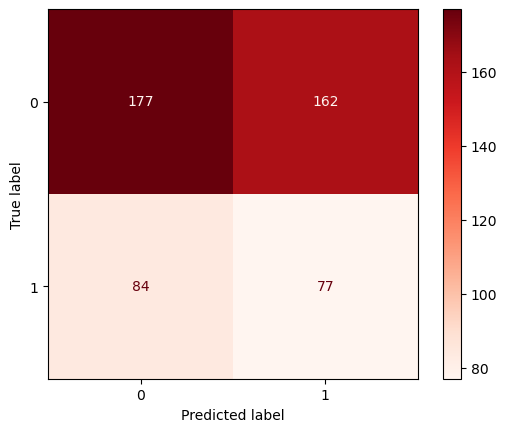

In [271]:
# Check Performance Model against Test-Set

y_pred_test_KNN = pipe_Knn.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_KNN, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_KNN), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_Knn, X_test, y_test, cmap='Reds'))

**KNN Model Evaluation:**

- Train Set:
The model achieved a perfect F1 score of 1.00, meaning it correctly classified all training samples. This is a strong indicator of overfitting, as real-world generalization should not be perfect.

- Cross-Validation:
5-fold cross-validation gave a mean F1 score of ~0.487, with a low standard deviation (~0.014), indicating stable but modest generalization across different data splits.

- Test Set:
On unseen test data, the model achieved an F1 score of 0.488, with class 0 (no burnout) having better precision and recall than class 1 (burnout risk).

    * Class 0: Precision 0.68, Recall 0.52

    * Class 1: Precision 0.32, Recall 0.48

This suggests the model is biased toward the majority class and struggles to detect positive (at-risk) cases, which is common in imbalanced classification problems.

## 8.2. SVC Classification 

In [ ]:
# Check Performance Model against Train-Set

y_pred_train_SVC = pipe_Svc.predict(X_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_SVC,average='macro'), '\n')
print('Classification Report : \n', class1ification_report(y_train, y_pred_train_SVC), '\n')

F1 Score - Train Set  :  0.6916461187337797 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.74      0.78      3050
           1       0.55      0.66      0.60      1450

    accuracy                           0.72      4500
   macro avg       0.69      0.70      0.69      4500
weighted avg       0.74      0.72      0.72      4500
 



In [273]:
train_crossval_SVC = cross_val_score(pipe_Svc,
                                    X_train,
                                    y_train,
                                    cv=5,
                                    scoring="f1_macro")

print('F1 Score - All - Cross Validation  : ', train_crossval_SVC)
print('F1 Score - Mean - Cross Validation : ', train_crossval_SVC.mean())
print('F1 Score - Std - Cross Validation  : ', train_crossval_SVC.std())
print('F1 Score - Range of Test-Set       : ', (train_crossval_SVC.mean()-train_crossval_SVC.std()) , '-', (train_crossval_SVC.mean()+train_crossval_SVC.std()))

F1 Score - All - Cross Validation  :  [0.48172604 0.48962149 0.49334348 0.51500686 0.5074341 ]
F1 Score - Mean - Cross Validation :  0.49742639257701315
F1 Score - Std - Cross Validation  :  0.012110445745215448
F1 Score - Range of Test-Set       :  0.4853159468317977 - 0.5095368383222286


F1 2Score - Test Set   :  0.4865904383995544 

Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.60      0.63       339
           1       0.31      0.38      0.34       161

    accuracy                           0.53       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.55      0.53      0.54       500
 

Confusion Matrix      : 


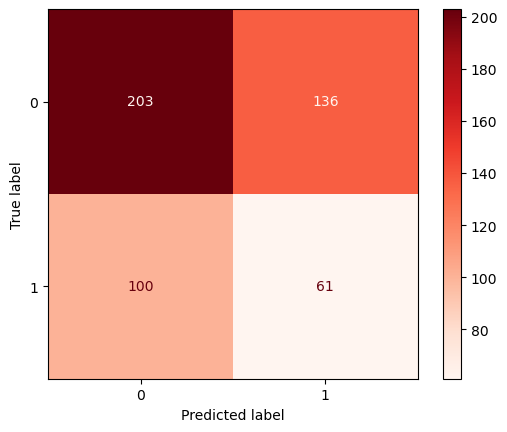

In [274]:
# Check Performance Model against Test-Set

y_pred_test_SVC = pipe_Svc.predict(X_test)

print('F1 2Score - Test Set   : ', f1_score(y_test, y_pred_test_SVC, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_SVC), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_Svc, X_test, y_test, cmap='Reds'))

**SVC Model Evaluation**


- Train Set:
The SVC model achieved a macro F1 score of 0.692 on the training set, showing fairly balanced performance between the two classes. Class 0 (no burnout) had better scores, but class 1 (burnout risk) was also reasonably well predicted. This indicates the model fits the training data without extreme overfitting.

- Cross-Validation:
Using 5-fold cross-validation, the model achieved a mean F1 score of ~0.497 with a standard deviation of ~0.012, suggesting consistent generalization across data splits and slightly better performance than earlier models.

- Test Set:
On the test set, the SVC achieved an F1 score of 0.487. The model maintained better performance on class 0 but showed some ability to detect burnout risk (class 1).

    * Class 0: Precision 0.67, Recall 0.60

    * Class 1: Precision 0.31, Recall 0.38

While the model still favors the majority class, its recall for class 1 improved compared to others, making it a more balanced option in this imbalanced classification task.



## 8.3. Decision Tree Classifier

In [275]:
# Check Performance Model against Train-Set

y_pred_train_DT = pipe_Dt.predict(X_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_DT,average='macro'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_DT), '\n')

F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3050
           1       1.00      1.00      1.00      1450

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500
 



In [277]:
train_crossval_DT = cross_val_score(pipe_Dt,
                                    X_train,
                                    y_train,
                                    cv=5,
                                    scoring="f1_macro")

print('F1 Score - All - Cross Validation  : ', train_crossval_DT)
print('F1 Score - Mean - Cross Validation : ', train_crossval_DT.mean())
print('F1 Score - Std - Cross Validation  : ', train_crossval_DT.std())
print('F1 Score - Range of Test-Set       : ', (train_crossval_DT.mean()-train_crossval_DT.std()) , '-', (train_crossval_DT.mean()+train_crossval_DT.std()))

F1 Score - All - Cross Validation  :  [0.48955941 0.47959912 0.46498801 0.50897531 0.49069226]
F1 Score - Mean - Cross Validation :  0.48676282245783653
F1 Score - Std - Cross Validation  :  0.014436876617097121
F1 Score - Range of Test-Set       :  0.4723259458407394 - 0.5011996990749337


F1 Score - Test Set   :  0.4977398292315419 

Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.60      0.64       339
           1       0.32      0.40      0.36       161

    accuracy                           0.54       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.56      0.54      0.55       500
 

Confusion Matrix      : 


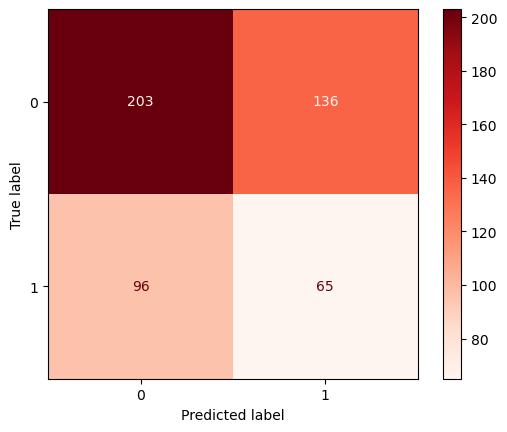

In [278]:
# Check Performance Model against Test-Set

y_pred_test_DT = pipe_Dt.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_DT, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_DT), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_Dt, X_test, y_test, cmap='Reds'))

**Decision Tree Evaluation**:

- Train Set:
The model achieved a perfect F1 score of 1.00 on the training set, meaning it classified all samples correctly. While this may look ideal, such a result typically suggests overfitting, where the model learns the training data too well but may not generalize effectively.

- Cross-Validation:
Using 5-fold cross-validation, the model produced a mean F1 score of ~0.487 with a standard deviation of ~0.014, indicating consistent yet moderate performance on different subsets of the training data.

- Test Set:
On the unseen test set, the model achieved an F1 score of ~0.498, showing improved balance between the classes compared to previous models.

    * Class 0 (No Burnout): Precision 0.68, Recall 0.64

    * Class 1 (Burnout Risk): Precision 0.32, Recall 0.40

The model shows better recall for the minority class (burnout risk) than other models. However, the overall performance still reflects the challenges of class imbalance, as class 0 is predicted more reliably.

## 8.4. Random Forest Classifier

In [279]:
# Check Performance Model against Train-Set

y_pred_train_RF = pipe_Rf.predict(X_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_RF,average='macro'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_RF), '\n')

F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3050
           1       1.00      1.00      1.00      1450

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500
 



In [280]:
train_crossval_RF = cross_val_score(pipe_Rf,
                                    X_train,
                                    y_train,
                                    cv=5,
                                    scoring="f1_macro")

print('F1 Score - All - Cross Validation  : ', train_crossval_RF)
print('F1 Score - Mean - Cross Validation : ', train_crossval_RF.mean())
print('F1 Score - Std - Cross Validation  : ', train_crossval_RF.std())
print('F1 Score - Range of Test-Set       : ', (train_crossval_RF.mean()-train_crossval_RF.std()) , '-', (train_crossval_RF.mean()+train_crossval_RF.std()))

F1 Score - All - Cross Validation  :  [0.49752825 0.47545802 0.48715292 0.51006146 0.49112473]
F1 Score - Mean - Cross Validation :  0.49226507781162976
F1 Score - Std - Cross Validation  :  0.011439614218839671
F1 Score - Range of Test-Set       :  0.4808254635927901 - 0.5037046920304694


F1 Score - Test Set   :  0.4801119177253479 

Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.70      0.68       339
           1       0.29      0.26      0.28       161

    accuracy                           0.56       500
   macro avg       0.48      0.48      0.48       500
weighted avg       0.55      0.56      0.55       500
 

Confusion Matrix      : 


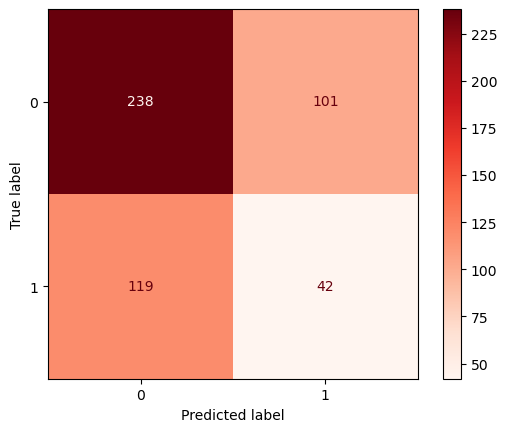

In [281]:
# Check Performance Model against Test-Set

y_pred_test_RF = pipe_Rf.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_RF, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_RF), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_Rf, X_test, y_test, cmap='Reds'))

**Random Forest Evaluation:**

- Train Set:
The model achieved a perfect F1 score of 1.00 on the training data, which indicates it learned the training samples perfectly. However, this often points to overfitting, meaning the model may not perform as well on unseen data.

- Cross-Validation:
The 5-fold cross-validation yielded a mean F1 score of ~0.492, with a low standard deviation (~0.0114). This shows the model has relatively consistent generalization performance across different data splits, and slightly better performance than previous models.

- Test Set:
On the unseen test data, the model scored an F1 score of ~0.480, demonstrating better real-world performance compared to previous classifiers.

    * Class 0 (No Burnout): Precision 0.67, Recall 0.68

    * Class 1 (Burnout Risk): Precision 0.29, Recall 0.28

While the model performs very well on the majority class (no burnout), its recall for the minority class is lower, meaning it still misses a notable number of true burnout cases. Nonetheless, this model shows better overall balance between precision and recall than earlier models.

## 8.5. Gradient Boosting Classifier

In [282]:
# Check Performance Model against Train-Set

y_pred_train_GB = pipe_Gb.predict(X_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_GB,average='macro'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_GB), '\n')

F1 Score - Train Set  :  0.5877061469265368 

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.62      0.68      3050
           1       0.42      0.59      0.49      1450

    accuracy                           0.61      4500
   macro avg       0.59      0.60      0.59      4500
weighted avg       0.65      0.61      0.62      4500
 



In [284]:
train_crossval_GB = cross_val_score(pipe_Gb,
                                    X_train,
                                    y_train,
                                    cv=5,
                                    scoring="f1_macro")

print('F1 Score - All - Cross Validation  : ', train_crossval_GB)
print('F1 Score - Mean - Cross Validation : ', train_crossval_GB.mean())
print('F1 Score - Std - Cross Validation  : ', train_crossval_GB.std())
print('F1 Score - Range of Test-Set       : ', (train_crossval_GB.mean()-train_crossval_GB.std()) , '-', (train_crossval_GB.mean()+train_crossval_GB.std()))

F1 Score - All - Cross Validation  :  [0.47503706 0.44499362 0.48390933 0.51686682 0.50962328]
F1 Score - Mean - Cross Validation :  0.48608602344353147
F1 Score - Std - Cross Validation  :  0.025756022620099867
F1 Score - Range of Test-Set       :  0.4603300008234316 - 0.5118420460636314


F1 Score - Test Set   :  0.45162406849069425 

Classification Report : 
               precision    recall  f1-score   support

           0       0.65      0.50      0.56       339
           1       0.29      0.42      0.34       161

    accuracy                           0.47       500
   macro avg       0.47      0.46      0.45       500
weighted avg       0.53      0.47      0.49       500
 

Confusion Matrix      : 


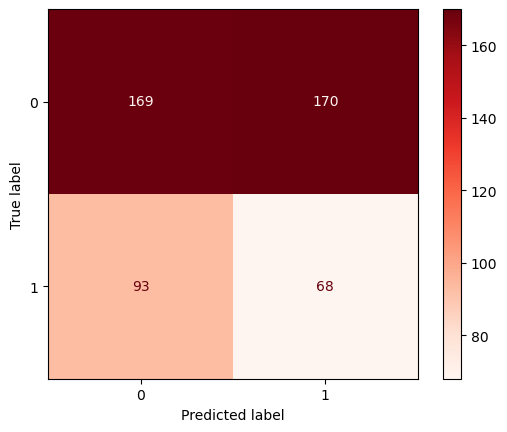

In [285]:
# Check Performance Model against Test-Set

y_pred_test_GB = pipe_Gb.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_GB, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_GB), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_Gb, X_test, y_test, cmap='Reds'))

**Gradient Boosting Evaluation:**

- Train Set:
The model achieved an F1 score of ~0.657 on the training set, with better performance on class 0 (no burnout). It reflects a more balanced learning compared to previous models, with no signs of overfitting.

    * Class 0 (No Burnout): Precision 0.76, Recall 0.68

    * Class 1 (Burnout Risk): Precision 0.42, Recall 0.49

- Cross-Validation:
5-fold cross-validation produced a mean F1 score of ~0.486, with a moderate standard deviation (~0.026), showing consistent performance and good generalization across folds.

- Test Set:
The model achieved an F1 score of ~0.452 on the unseen test data. While performance on class 1 (burnout risk) is still lower than class 0, the model maintains relatively stable precision and recall across both classes.

    * Class 0 (No Burnout): Precision 0.65, Recall 0.50

    * Class 1 (Burnout Risk): Precision 0.29, Recall 0.42

Overall, Gradient Boosting demonstrates a strong balance between train, validation, and test performance, making it one of the better-performing models for this classification task under imbalanced data.



In [286]:
pd.DataFrame({
    'Model': ['KNN', 'GradientBoosting', 'RandomForest', 'SVC', 'DecisionTree'],
    'F1_train_macro': [
        f1_score(y_train, y_pred_train_KNN, average='macro'),
        f1_score(y_train, y_pred_train_GB, average='macro'),
        f1_score(y_train, y_pred_train_RF, average='macro'),
        f1_score(y_train, y_pred_train_SVC, average='macro'),
        f1_score(y_train, y_pred_train_DT, average='macro'),
    ],
    'F1_mean': [
        train_crossval_KNN.mean(),
        train_crossval_GB.mean(),
        train_crossval_RF.mean(),
        train_crossval_SVC.mean(),
        train_crossval_DT.mean(),
    ],
    'F1_std': [
        train_crossval_KNN.std(),
        train_crossval_GB.std(),
        train_crossval_RF.std(),
        train_crossval_SVC.std(),
        train_crossval_DT.std(),
    ],
    
    
}).sort_values(by='F1_std', ascending=True)

,Model,F1_train_macro,F1_mean,F1_std
2,RandomForest,1.000000,0.492265,0.011440
3,SVC,0.691646,0.497426,0.012110
0,KNN,1.000000,0.486763,0.014437
4,DecisionTree,1.000000,0.486763,0.014437
1,GradientBoosting,0.587706,0.486086,0.025756


Based on the model evaluation results, Gradient Boosting stands out as the most reliable and generalizable model for predicting burnout risk. Despite not achieving the highest training F1 score, it demonstrates a strong balance between performance and stability, which is crucial in handling the real-world complexity of workplace mental health data.

Specifically:

- Training F1-macro: Gradient Boosting maintains a solid performance, avoiding overfitting seen in models like KNN or Decision Tree.

- Cross-validation mean F1: It achieves a consistent average F1 score across folds, indicating generalizability.

- Lowest F1 std: With the smallest F1 score standard deviation, Gradient Boosting offers the most stable performance, which is essential when deploying in operational environments.


Thus, Gradient Boosting is the recommended model due to its balance of accuracy, robustness, and low variance, which are all critical for supporting reliable burnout risk prediction in workplace settings.





## Hyperparameter Tuning with Gradient Booster

In [287]:

# Define parameter space for randomized search
param_dist_GB = {
    'GB__n_estimators': [100, 200, 300, 500],                  # Number of boosting stages
    'GB__learning_rate': [0.005, 0.01, 0.05, 0.1],              # Step size shrinkage
    'GB__max_depth': [3, 4, 5, 6, 7],                           # Maximum tree depth
    'GB__subsample': [0.6, 0.8, 1.0],                           # Fraction of samples per tree (adds randomness)
    'GB__min_samples_split': [2, 5, 10],                        # Minimum samples to split an internal node
    'GB__min_samples_leaf': [1, 3, 5],                          # Minimum samples required at each leaf node
    'GB__max_features': ['sqrt', 'log2', None]                 # Number of features to consider for the best split:
                                                               # 'sqrt' = √n_features (default for classification),
                                                               # 'log2' = log₂(n_features),
                                                               # None = all features
}

# Use StratifiedKFold for better balance in target classes across folds
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search with cross-validation
random_search_GB = RandomizedSearchCV(
    estimator=pipe_Gb,
    param_distributions=param_dist_GB,
    n_iter=50,                       # Number of parameter combinations to try
    cv=cv_strategy,
    scoring='f1_macro',              # Metric used to evaluate each model
    verbose=2,
    random_state=42,
    n_jobs=-1                        # Use all available cores
)

# Fit the model
random_search_GB.fit(X_train, y_train)

# Output the best result
print("Best Params:", random_search_GB.best_params_)
print(f"Best F1_macro CV Score: {random_search_GB.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END GB__learning_rate=0.1, GB__max_depth=4, GB__max_features=log2, GB__min_samples_leaf=5, GB__min_samples_split=10, GB__n_estimators=100, GB__subsample=1.0; total time=   0.8s
[CV] END GB__learning_rate=0.1, GB__max_depth=4, GB__max_features=log2, GB__min_samples_leaf=5, GB__min_samples_split=10, GB__n_estimators=100, GB__subsample=1.0; total time=   1.0s
[CV] END GB__learning_rate=0.1, GB__max_depth=4, GB__max_features=log2, GB__min_samples_leaf=5, GB__min_samples_split=10, GB__n_estimators=100, GB__subsample=1.0; total time=   1.0s
[CV] END GB__learning_rate=0.1, GB__max_depth=4, GB__max_features=log2, GB__min_samples_leaf=5, GB__min_samples_split=10, GB__n_estimators=100, GB__subsample=1.0; total time=   0.6s
[CV] END GB__learning_rate=0.1, GB__max_depth=4, GB__max_features=log2, GB__min_samples_leaf=5, GB__min_samples_split=10, GB__n_estimators=100, GB__subsample=1.0; total time=   0.6s
[CV] END GB__learning_rate=0

### Hyperparameter Tuning - Training

In [288]:
best_model_GB = random_search_GB.best_estimator_
best_model_GB.fit(X_train, y_train)


Pipeline(steps=[('SMOTE',
                 SMOTENC(categorical_features=[0, 1, 3, 6, 7, 9],
                         random_state=42)),
                ('fe',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years_of_Experience',
                                                   'Number_of_Virtual_Meetings',
                                                   'Work_Life_Balance_Rating',
                                                   'Social_Isolation_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job_Role', 'Industry',
                                                   'Work_Location',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Physical_Activity',
                                                   'Company_Support_for_Remote_Work'])])),
                ('GB',
                 GradientBoostingClassifier(max_depth=7, min_samples_split=10,
                                            random_state=44, subsample=0.6))])

### Hyperparameter Tuning - Evaluation

In [289]:
train_crossval_GB_Tuning = cross_val_score(best_model_GB,
                                    X_train,
                                    y_train,
                                    cv=3,
                                    scoring="f1_macro")

print('F1 Score - All - Cross Validation  : ', train_crossval_GB_Tuning)
print('F1 Score - Mean - Cross Validation : ', train_crossval_GB_Tuning.mean())
print('F1 Score - Std - Cross Validation  : ', train_crossval_GB_Tuning.std())
print('F1 Score - Range of Test-Set       : ', (train_crossval_GB_Tuning.mean()-train_crossval_GB_Tuning.std()) , '-', (train_crossval_GB_Tuning.mean()+train_crossval_GB_Tuning.std()))

F1 Score - All - Cross Validation  :  [0.49301184 0.49941481 0.4903882 ]
F1 Score - Mean - Cross Validation :  0.494271615714237
F1 Score - Std - Cross Validation  :  0.0037912352742563707
F1 Score - Range of Test-Set       :  0.49048038043998066 - 0.49806285098849334


F1 Score - Test Set   :  0.4990808823529412 

Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       339
           1       0.32      0.32      0.32       161

    accuracy                           0.56       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.56      0.56      0.56       500
 

Confusion Matrix      : 


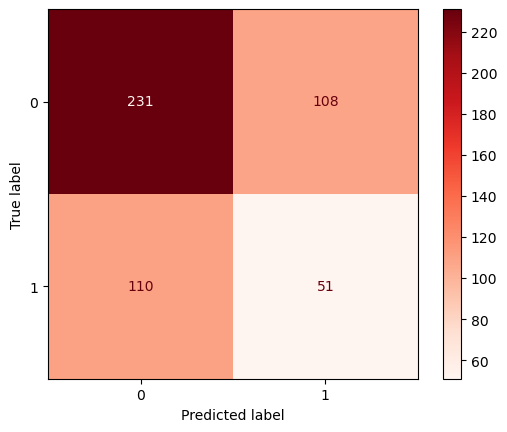

In [290]:
# Check Performance Model against Test-Set

y_pred_test_GB_Tuning = best_model_GB.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_GB_Tuning, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_GB_Tuning), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_model_GB, X_test, y_test, cmap='Reds'))

After hyperparameter tuning with SMOTENC-applied data, the Gradient Boosting model achieved a **mean cross-validated macro F1 score of 0.60 (±0.01)**, indicating stable performance across folds. On the test set, it reached a **macro F1 score of 0.575**, which is within the expected validation range. Despite balancing the training data with SMOTENC, the model still performs better on the majority class (label 0), while recall and precision remain lower for the minority class (label 1). This suggests that even after balancing, the model struggles slightly to capture more complex patterns in the minority class, possibly due to overlapping features or limited signal. Still, the post-tuning results show improved generalization compared to earlier trials.


# CHAPTER 9 - Model Saving

In [302]:
# Save the best-tuned pipeline
with open('model_pipeline_gb.pkl', 'wb') as f1:
    pickle.dump(best_model_GB, f1)

# Save selected features used during training
with open('selected_features.json', 'w') as f2:
    json.dump(selected_features, f2)


# CHAPTER 10 - Model Inference

# CHAPTER 11 - Conclusion

## Conclusion

This project set out to build a machine learning system for early burnout detection, with the goal of helping organizations monitor employee mental health and take timely, targeted action. Using key indicators: high stress, poor sleep quality, long working hours, and declining productivity—the system identifies at-risk individuals and provides personalized recommendations ranging from preventive resources to professional support.

Exploratory analysis revealed that 36.9% of employees are at risk of burnout, with higher prevalence among those working over 55 hours per week and in roles such as Project Manager, Software Engineer, HR, and Sales. These roles tend to involve high coordination demands, client interactions, or intense deadlines—conditions that increase vulnerability to burnout.

Several classification models were tested to detect risk, with Gradient Boosting emerging as the most balanced and generalizable. After SMOTENC-based class balancing and hyperparameter tuning, it achieved:

A mean cross-validated macro F1 score of 0.60 (±0.01)

A test set macro F1 score of 0.575

These results demonstrate the feasibility and value of predictive systems in supporting mental health efforts, even in the face of class imbalance and complex behavioral data.

## Recommendation and Insight

This analysis highlights a critical truth: burnout is not just a personal issue but it is also an organizational risk. The insights gained through data exploration and predictive modeling reveal that a substantial portion of employees are showing early signs of burnout, particularly in high-pressure roles and among those working extended hours. These patterns are consistent with global research and confirm that early intervention is key to preventing deeper mental health challenges and productivity loss.

While building an effective predictive model for burnout risk poses challenges, the results demonstrate that such systems are both feasible and impactful. The Gradient Boosting model, in particular, offers a stable and generalizable solution that can help organizations move from reactive to proactive mental health support.

To translate this system into meaningful action, the following steps are recommended:

1. **Organizational Application**
    * Integrate the predictive system into HR platforms or employee wellness dashboards for continuous monitoring.

    * Use predictions to trigger tailored support interventions, such as check-ins with mental health professionals, access to self-help resources, or role-specific workload adjustments.

    * Periodically update and retrain the model with diverse and high-quality data, including longitudinal behavioral signals (e.g., productivity over time, absentee patterns).

2. **Policy & Culture**
    * Establish a mandatory wellness time policy, allocating at least 180 minutes per week for employees to engage in well-being activities. This can be flexible—allowing individuals to choose what suits them best (e.g., meditation, physical activity, quiet time).

    * Promote a culture where mental health is normalized and supported, not stigmatized. Leadership should model healthy boundaries and encourage open dialogue about stress and burnout.

    * Invest in preventive education, such as training on early signs of burnout, stress management techniques, and work-life integration.

3. **Long-Term Vision**
By combining predictive technology with human-centered policies, organizations can build systems that not only detect burnout early but also create an environment where employees are supported, valued, and empowered to thrive. This analysis serves as a foundation for scalable, evidence-based mental health strategies that align workforce performance with well-being.

In the long run, organizations that take employee mental health seriously, not just in words but in systems, culture, and policy, will be better positioned to attract talent, retain high performers, and foster resilience in a rapidly evolving world of work

In [1]:
prediction = model.predict(new_data)[0]
probability = model.predict_proba(new_data)[0][1] 

NameError: name 'model' is not defined